In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.42


In [3]:
def build(robot):
    R=.5
    r=R/5
    
    x=2
    y=3
    angle=0
    disk_center=Disk(robot,x,y,radius=R,angle=angle,name='center')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    robot.disks=disks
    robot.angles=list(range(0,360,30))
    robot.distances=[-1]*len(disks)

In [5]:
def right(t,robot):
    for disk in robot.disks:
        disk.F=0
        
    robot['disk 0'].F=10
    return True

def up(t,robot):
    for disk in robot.disks:
        disk.F=0
        
    robot['disk 90'].F=10
    return True

def down(t,robot):
    for disk in robot.disks:
        disk.F=0
        
    robot['disk 270'].F=10
    return True

def left(t,robot):
    for disk in robot.disks:
        disk.F=0
        
    robot['disk 180'].F=10
    return True


In [6]:
def until_right_wall(t,robot):
    distance=robot['disk 0'].read_distance()
    
    if distance<2:
        return True
    
    
def until_top_wall(t,robot):
    distance=robot['disk 90'].read_distance()
    
    if distance<2:
        return True
    
def until_bottom_wall(t,robot):
    distance=robot['disk 270'].read_distance()
    
    if distance<2:
        return True    
    
def until_left_wall(t,robot):
    distance=robot['disk 180'].read_distance()
    
    if distance<2:
        return True        

In [15]:
def until_target_x(t,robot):
    
    if abs(robot['center'].x-robot.target_x)<0.01:
        return True    

def until_target_y(t,robot):
    
    if abs(robot['center'].y-robot.target_y)<0.01:
        return True    


In [16]:
def monitor(t,robot):
    robot.message=t,robot.controller.current_state

In [17]:
state_machine=StateMachine(
    (right,'until_target_x'),
    (until_target_x,"up"),
    (up,'until_target_y'),
    (until_target_y,"_end_simulation")
)


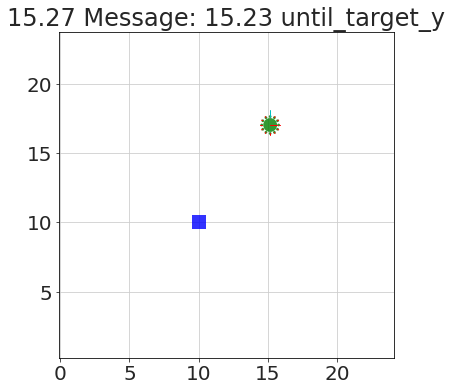

In [18]:
env=FrictionEnvironment(24,24)
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

Box(env,x=10,y=10)

robot.target_x=15
robot.target_y=17

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=30,
       dt_display=0.3,  # make this larger for a faster display
       )
